# Solving Median House Value classification problem with deep neural networks and tf.Keras

In this example we tune the neural architecture to achieve good results.

We have seen in previous examples how Keras defines the structure of a neural network as a Sequential model using the the sequential API.
However it is also possible to use the **functional API**, which is a lot more flexible. It provides complete freedom over the design of the neural network.

Code by [D. Manrique](https://orcid.org/0000-0002-0792-4156)

## Import libraries

In [6]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Tensorflow version: 2.19.0
Keras version: 3.9.2


## Load data

In [8]:
ATT_FILE = "MedianHouseValuePreparedCleanAttributes.csv"
LABEL_FILE = "MedianHouseValueOneHotEncodedClasses.csv"

TRAIN_RATE=0.8

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

x_train: (16342, 9)
t_train: (16342, 3)
x_dev: (2043, 9)
t_dev: (2043, 3)


## Initialize variables

In [10]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

In [11]:
x_train[:5]

array([[-0.61752988,  0.11583422,  1.        , -0.81875986, -0.72346369,
        -0.9229799 , -0.72011182, -0.54388215,  0.33333333],
       [ 0.1812749 , -0.64718385, -0.09803922, -0.83997151, -0.71849783,
        -0.84041033, -0.72438744, -0.79931311, -1.        ],
       [ 0.33665339, -0.79383634, -0.45098039, -0.91144005, -0.92147734,
        -0.94730794, -0.91021214, -0.2504931 , -1.        ],
       [-0.93625498,  0.68119022,  0.29411765, -0.94892924, -0.93420236,
        -0.97533563, -0.94836376, -0.7090385 , -1.        ],
       [ 0.25697211, -0.68119022,  0.33333333, -0.91189786, -0.88764742,
        -0.9145716 , -0.88718961, -0.65516338, -1.        ]])

In [12]:
t_train[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [13]:
x_dev[:5]

array([[-0.61553785,  0.10945802,  1.        , -0.89389084, -0.84916201,
        -0.93951624, -0.83982898, -0.69925932,  0.33333333],
       [-0.17131474,  0.17534538,  0.64705882, -0.99491327, -0.99441341,
        -0.99770173, -0.99605328, -1.        , -0.33333333],
       [ 0.02390438, -0.63443146,  0.17647059, -0.98870746, -0.97299814,
        -0.98189411, -0.97138629, -0.74136908,  1.        ],
       [ 0.29083665, -0.65993624,  0.1372549 , -0.87318785, -0.81843575,
        -0.93632109, -0.81647755, -0.66378395, -0.33333333],
       [ 0.20717131, -0.68119022,  0.84313725, -0.93127829, -0.84885164,
        -0.89114045, -0.84015787, -0.7329692 , -1.        ]])

In [14]:
t_dev[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Set hyperparameters

 A 9-500-250-75-25-3 full-connected deep neural network architecture

In [17]:
n_epochs = 350
lr = 0.1
batch_size = 512
n_neurons_per_hlayer = [500, 250, 75, 25]

## Build the deep neural model

Using **the functional API**, the Input layer defines the shape of each data element to expect as a tuple.
* The Input layer defines the shape of each data element to expect as a tuple.
* The Dense layers contain a number of neurons that are densely connected to the previous layer (every unit in the layer is connected to every unit in the previous layer).

In [20]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer
for neurons in n_neurons_per_hlayer:
  x = keras.layers.Dense(units=neurons, activation = 'relu')(x)
output_layer = keras.layers.Dense(units=OUTPUTS, activation = 'softmax')(x)
model = keras.models.Model(input_layer, output_layer, name='DeepFeedForward')
model.summary()

Model: "DeepFeedForward"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 75)             │        18,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,053 (590.05 KB)

 Trainable params: 151,053 (590.05 KB)

 Non-trainable params: 0 (0.00 B)

For example, the last layer's kernel comprises 78 parameters to adjust: 25 neurons in the previous layer by 3 neurons in the output layer plus the 3 biases, one for each output neuron.

## Compile the model

Available loss functions, optimizers, and metrics at: https://keras.io/losses/, https://keras.io/optimizers/ and https://keras.io/metrics/.

In [24]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              metrics=["categorical_accuracy"])

## Train the model with M-BGD

In [26]:
import time
start = time.perf_counter()
history = model.fit(x_train, t_train, batch_size=batch_size, epochs=n_epochs, verbose=0, validation_data=(x_dev, t_dev))
print (time.perf_counter() - start)

42.332894916999976


## Get the results

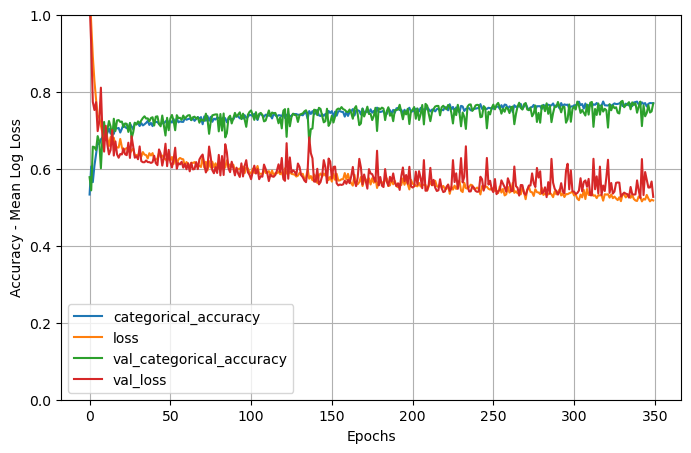

In [28]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [29]:
history.params

{'verbose': 0, 'epochs': 350, 'steps': 32}

In [30]:
results[-1:]

,categorical_accuracy,loss,val_categorical_accuracy,val_loss
349,0.770408,0.517619,0.769457,0.526855


In [31]:
print ("Accuracy for the training set: ", results.categorical_accuracy.values[-1:][0])

Accuracy for the training set:  0.7704075574874878


In [32]:
print ("Accuracy for the development test set: ", results.val_categorical_accuracy.values[-1:][0])

Accuracy for the development test set:  0.769456684589386


Let's see how the model predicts using the development test set:

In [34]:
dev_predictions=model.predict(x_dev).round(2)
dev_predictions[:20]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


array([[0.05, 0.29, 0.67],
       [0.94, 0.05, 0.  ],
       [0.3 , 0.53, 0.17],
       [0.21, 0.72, 0.07],
       [0.66, 0.3 , 0.05],
       [0.46, 0.47, 0.07],
       [0.82, 0.18, 0.  ],
       [0.01, 0.19, 0.8 ],
       [0.97, 0.03, 0.  ],
       [0.39, 0.58, 0.03],
       [0.  , 0.16, 0.83],
       [0.12, 0.55, 0.33],
       [0.02, 0.03, 0.96],
       [0.  , 0.61, 0.39],
       [0.03, 0.88, 0.09],
       [0.01, 0.38, 0.61],
       [0.99, 0.01, 0.  ],
       [0.87, 0.12, 0.01],
       [0.  , 0.  , 1.  ],
       [0.76, 0.2 , 0.04]], dtype=float32)

In [35]:
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [36]:
t_dev[:20] #target classes

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [37]:
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(t_dev,1))
print (dev_correct_predictions[:30])

[ True False False  True  True  True False  True  True False  True False
 False  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True]


In [38]:
from collections import Counter
Counter (dev_correct_predictions)

Counter({True: 1573, False: 470})

## Final Test

We are suppossing that this is the final model that achieves the best performance.

### Get the final test set

In [42]:
n_final_test = n_instances-n_train-n_dev

x_final_test = attributes.values[n_train+n_dev:n_instances]
t_final_test = label.values[n_train+n_dev:n_instances]

print ("x_test:",x_final_test.shape)
print ("t_test:",t_final_test.shape)

x_test: (2043, 9)
t_test: (2043, 3)


### Evaluate the model

In [44]:
model.evaluate(x_final_test, t_final_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - categorical_accuracy: 0.7779 - loss: 0.5161


[0.5258987545967102, 0.7719040513038635]

Predictions on the final test set:

In [46]:
test_predictions=model.predict(x_final_test)
test_rounded_predictions=np.round(test_predictions)
indices = np.argmax(test_predictions,1)
for row, index in zip(test_rounded_predictions, indices): row[index]=1
test_rounded_predictions[:20]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

The target outputs:

In [48]:
t_final_test[:20]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

The first 30 predictions. True means that the neural network correctly classifies the input vector.  

In [50]:
test_correct_predictions = np.equal(np.argmax(test_rounded_predictions,1),np.argmax(t_final_test,1))
test_correct_predictions[:30]

array([ True,  True, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True])

The final test accuracy:

In [52]:
from collections import Counter
final_test_prediction_results=Counter(test_correct_predictions)
final_test_prediction_results

Counter({True: 1577, False: 466})

In [53]:
final_test_prediction_results[True]/sum(final_test_prediction_results.values())

0.7719040626529613

### Confusion Matrix on the final test set

In [55]:
test_sparse_predictions = np.argmax (test_predictions,axis=1)
test_sparse_targets = np.argmax(t_final_test, axis=1)
print('Confusion Matrix')
c_m=pd.DataFrame(confusion_matrix(test_sparse_predictions,test_sparse_targets),columns=['True_Cheap', 'True_Average', 'True_Expensive'])
c_m.insert(0,'Classes',['Pred_Cheap', 'Pred_Average', 'Pred_Expensive'])
c_m['Sum']=c_m.sum(axis=1, numeric_only=True)
c_m

Confusion Matrix


,Classes,True_Cheap,True_Average,True_Expensive,Sum
0,Pred_Cheap,545,119,19,683
1,Pred_Average,88,475,152,715
2,Pred_Expensive,2,86,557,645


### Clasification metrics

In [57]:
print('Classification Report')
classes = ['Cheap', 'Average', 'Expensive']
print(classification_report(test_sparse_targets, test_sparse_predictions, target_names=classes))

Classification Report
              precision    recall  f1-score   support

       Cheap       0.80      0.86      0.83       635
     Average       0.66      0.70      0.68       680
   Expensive       0.86      0.77      0.81       728

    accuracy                           0.77      2043
   macro avg       0.78      0.77      0.77      2043
weighted avg       0.78      0.77      0.77      2043



The classification metrics improve with respect to those from the one-hidden layer neural model. Again, the class *Average* achieves the worst results.